In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk

df = pd.read_csv("Downloads/Restaurant reviews.csv")


df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [6]:
df['Rating'].value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [7]:
df.drop(index=df[df['Rating']=='Like'].index,inplace=True)

In [8]:
def rating_to_sentiment(rating):
    if rating >= 3:
        return 'positive'
    else:
        return 'negative'
df['Rating'] = df['Rating'].apply(float)
df['sentiment'] = df['Rating'].apply(rating_to_sentiment)
df['binary_sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 3 else 'negative')
df['binary_sentiment'].head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: binary_sentiment, dtype: object

In [10]:
def preprocess_text(text):
    text = text.lower()
    text = text.replace("don't", "do not")
    text = text.replace("won't", "will not")
    text = text.replace("can't", "cannot")
    text = text.replace("n't", " not")
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    

    return text
df['Review'] = df['Review'].fillna("")
df['cleaned_comments'] = df['Review'].apply(preprocess_text)
preprocess_text("Hi I'm 9876576767 8787878787 I can't 9 eat this &^%H@#$%")

'hi im i cannot eat this h'

In [11]:
df['sentiment'].value_counts()

sentiment
positive    7514
negative    2485
Name: count, dtype: int64

/var/folders/vz/17g6c8rn0cg61kgd_10lmz300000gn/T/ipykernel_75034/3316946635.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [review_counts[0], review_counts[1]]
/var/folders/vz/17g6c8rn0cg61kgd_10lmz300000gn/T/ipykernel_75034/3316946635.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette=['green', 'red'])


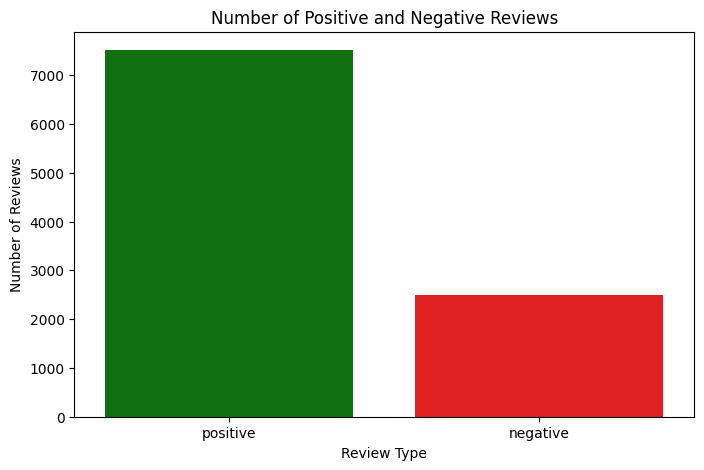

In [26]:
review_counts = df['sentiment'].value_counts()
labels = ['positive', 'negative']
counts = [review_counts[0], review_counts[1]]

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=counts, palette=['green', 'red'])

plt.title('Number of Positive and Negative Reviews')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.show()

/var/folders/vz/17g6c8rn0cg61kgd_10lmz300000gn/T/ipykernel_75034/3316946635.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [review_counts[0], review_counts[1]]
/var/folders/vz/17g6c8rn0cg61kgd_10lmz300000gn/T/ipykernel_75034/3316946635.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette=['green', 'red'])


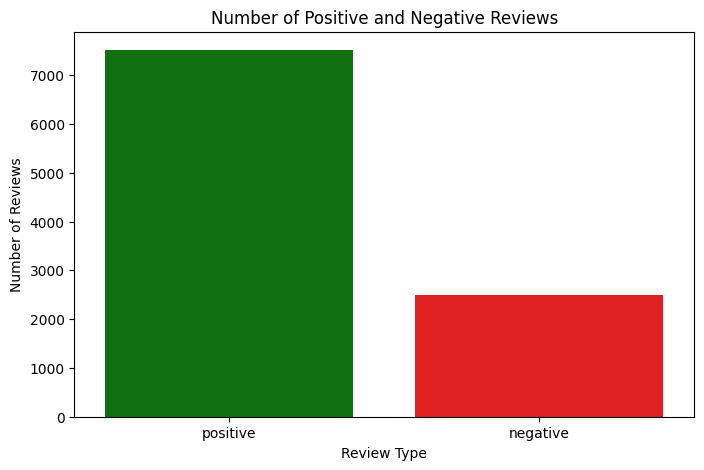

In [26]:
review_counts = df['sentiment'].value_counts()
labels = ['positive', 'negative']
counts = [review_counts[0], review_counts[1]]

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=counts, palette=['green', 'red'])

plt.title('Number of Positive and Negative Reviews')
plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')
plt.show()

In [12]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)

X = vectorizer.fit_transform(df['cleaned_comments'])
y = df['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = vectorizer.get_feature_names_out()

bow_df = pd.DataFrame(X.toarray(), columns=feature_names)

word_frequencies = bow_df.sum().sort_values(ascending=False)
print("\nMost Frequent Words:")
print(word_frequencies.head(10))




Most Frequent Words:
good        7007
food        6488
place       5663
service     3156
chicken     3043
taste       2214
ordered     2163
ambience    2044
great       1936
really      1659
dtype: int64


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, preds))
    results[name] = acc


Model: Naive Bayes
Accuracy: 0.889
              precision    recall  f1-score   support

    negative       0.83      0.72      0.77       515
    positive       0.91      0.95      0.93      1485

    accuracy                           0.89      2000
   macro avg       0.87      0.83      0.85      2000
weighted avg       0.89      0.89      0.89      2000


Model: Logistic Regression
Accuracy: 0.890
              precision    recall  f1-score   support

    negative       0.83      0.72      0.77       515
    positive       0.91      0.95      0.93      1485

    accuracy                           0.89      2000
   macro avg       0.87      0.83      0.85      2000
weighted avg       0.89      0.89      0.89      2000


Model: Linear SVC
Accuracy: 0.876
              precision    recall  f1-score   support

    negative       0.78      0.73      0.75       515
    positive       0.91      0.93      0.92      1485

    accuracy                           0.88      2000
   macro avg 

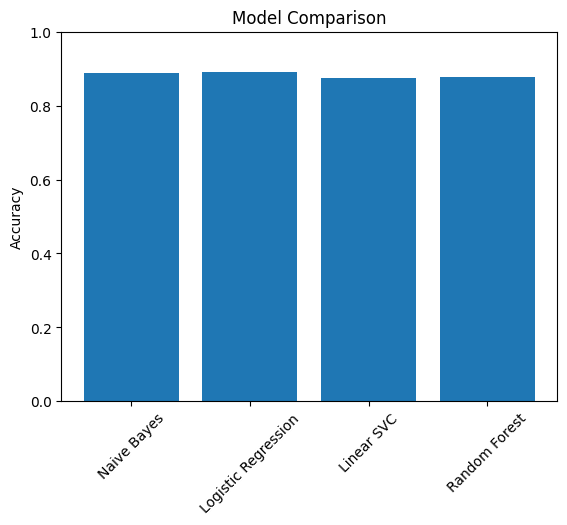

In [14]:
plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [12]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

X = vectorizer.fit_transform(df['cleaned_comments'])
y = df['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = vectorizer.get_feature_names_out()

bow_df = pd.DataFrame(X.toarray(), columns=feature_names)

word_frequencies = bow_df.sum().sort_values(ascending=False)
print("\nMost Frequent Words:")
print(word_frequencies.head(10))




Most Frequent Words:
good        856.523212
food        464.160687
place       379.657042
service     298.303116
chicken     247.448685
nice        237.261424
taste       233.074320
great       219.674277
ambience    199.078084
time        197.505645
dtype: float64


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight= 'balanced'),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, preds))
    results[name] = acc


Model: Naive Bayes
Accuracy: 0.889
              precision    recall  f1-score   support

    negative       0.83      0.72      0.77       515
    positive       0.91      0.95      0.93      1485

    accuracy                           0.89      2000
   macro avg       0.87      0.83      0.85      2000
weighted avg       0.89      0.89      0.89      2000


Model: Logistic Regression
Accuracy: 0.888
              precision    recall  f1-score   support

    negative       0.75      0.86      0.80       515
    positive       0.95      0.90      0.92      1485

    accuracy                           0.89      2000
   macro avg       0.85      0.88      0.86      2000
weighted avg       0.90      0.89      0.89      2000


Model: Linear SVC
Accuracy: 0.876
              precision    recall  f1-score   support

    negative       0.78      0.73      0.75       515
    positive       0.91      0.93      0.92      1485

    accuracy                           0.88      2000
   macro avg 

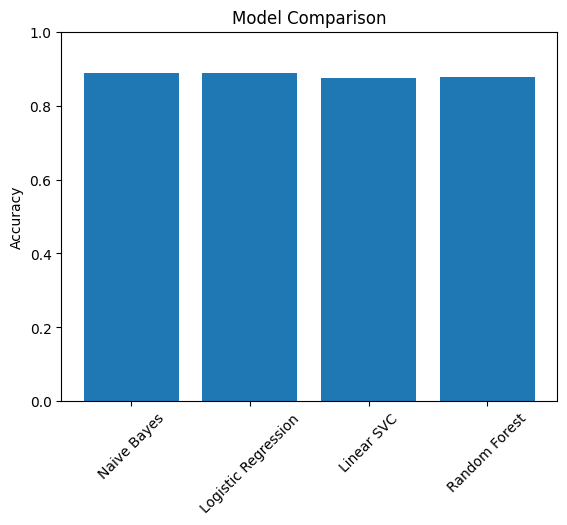

In [16]:
plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize_review(text):
    words = nlp(text)
    txt = ' '.join(word.lemma_ for word in words)
    return txt

lemmatize_review("the cats are running faster than the other cat.")

'the cat be run fast than the other cat .'

In [20]:
df['lemmatized_comments'] = df['cleaned_comments'].apply(lemmatize_review)

In [21]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(df['lemmatized_comments'])
y = df['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight= 'balanced'),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, preds))
    results[name] = acc


Model: Naive Bayes
Accuracy: 0.885
              precision    recall  f1-score   support

    negative       0.82      0.71      0.76       515
    positive       0.91      0.94      0.92      1485

    accuracy                           0.89      2000
   macro avg       0.86      0.83      0.84      2000
weighted avg       0.88      0.89      0.88      2000


Model: Logistic Regression
Accuracy: 0.879
              precision    recall  f1-score   support

    negative       0.73      0.84      0.78       515
    positive       0.94      0.89      0.92      1485

    accuracy                           0.88      2000
   macro avg       0.84      0.87      0.85      2000
weighted avg       0.89      0.88      0.88      2000


Model: Linear SVC
Accuracy: 0.872
              precision    recall  f1-score   support

    negative       0.77      0.71      0.74       515
    positive       0.90      0.93      0.91      1485

    accuracy                           0.87      2000
   macro avg 

In [23]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

X = vectorizer.fit_transform(df['lemmatized_comments'])
y = df['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight= 'balanced'),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, preds))
    results[name] = acc


Model: Naive Bayes
Accuracy: 0.800
              precision    recall  f1-score   support

    negative       0.97      0.23      0.37       515
    positive       0.79      1.00      0.88      1485

    accuracy                           0.80      2000
   macro avg       0.88      0.61      0.63      2000
weighted avg       0.83      0.80      0.75      2000


Model: Logistic Regression
Accuracy: 0.881
              precision    recall  f1-score   support

    negative       0.72      0.89      0.79       515
    positive       0.96      0.88      0.92      1485

    accuracy                           0.88      2000
   macro avg       0.84      0.88      0.86      2000
weighted avg       0.90      0.88      0.88      2000


Model: Linear SVC
Accuracy: 0.893
              precision    recall  f1-score   support

    negative       0.83      0.73      0.78       515
    positive       0.91      0.95      0.93      1485

    accuracy                           0.89      2000
   macro avg 